In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


df=pd.read_csv("C:/Users/varsh/Downloads/Retail_Transactions_2000.csv")

In [202]:
print(df.shape)
print(df.columns)
print(df.isnull().sum())
print("Dupliacte",df.duplicated().sum())

(2000, 11)
Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')
TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64
Dupliacte 0


In [203]:
notcrt_age=df[df["Age"]<=0]
print("not age",len(notcrt_age))

notcrt_quant=df[df["Quantity"]<=0]
print("not quant",len(notcrt_quant))

notcrt_price=df[df["Price"]<=0]
print("not price",len(notcrt_price))

notcrt_tamount=df[df["TotalAmount"]<=0]
print("not tamount",len(notcrt_tamount))

not age 0
not quant 0
not price 0
not tamount 0


In [204]:
missing_data=df.dropna(subset=["TransactionID","ProductCategory"])
print("Before",len(df))
print("After",len(df))

Before 2000
After 2000


In [205]:
for i in ["Age", "Quantity", "Price", "TotalAmount"]: #after changing the outliers before in the TotalAmount it is 26
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower= Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    outlier= (df[i] < lower) | (df[i] > upper)
    outlier_count = outlier.sum()
    print(f"Outliers in {i}: {outlier_count}")


Outliers in Age: 0
Outliers in Quantity: 0
Outliers in Price: 0
Outliers in TotalAmount: 26


np.where(condition, value_if_true, value_if_false) → acts like an IF–ELSE.


if TotalAmount is greater than upper_bound, set it equal to upper_bound.


Else if TotalAmount is less than lower_bound, set it equal to lower_bound.


else (if it is between bounds), keep the original value.

In [206]:
df['TotalAmount'] = np.where(df['TotalAmount'] >upper,upper,
                             np.where(df['TotalAmount'] < lower,lower, 
                                      df['TotalAmount']))


In [207]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month  
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [208]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437.0,3,Wednesday
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255.0,1,Sunday
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111.0,4,Tuesday
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730.0,8,Wednesday
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123.0,9,Saturday


In [209]:

df['AgeGroup']=pd.cut(
    df['Age'],
    bins=[17, 25, 40, 60, 100], 
    labels=['18-25', '26-40', '41-60', '60+'] 
)


In [210]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437.0,3,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255.0,1,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111.0,4,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730.0,8,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123.0,9,Saturday,41-60


In [211]:
le=LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

df['ProductCategory_encoded'] = le.fit_transform(df['ProductCategory'])

df['City_encoded'] = le.fit_transform(df['City'])

df['Payment_encoded']=le.fit_transform(df["PaymentMode"])

In [212]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup,Gender_encoded,ProductCategory_encoded,City_encoded,Payment_encoded
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437.0,3,Wednesday,26-40,0,3,1,1
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255.0,1,Sunday,18-25,2,1,9,0
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111.0,4,Tuesday,41-60,2,4,9,3
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730.0,8,Wednesday,18-25,2,5,4,1
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123.0,9,Saturday,41-60,0,6,2,3


In [213]:
print(df[['Age','Price','TotalAmount']].describe())


               Age       Price   TotalAmount
count  2000.000000  2000.00000   2000.000000
mean     44.679000  2496.61000   7292.290750
std      15.179795  1413.95187   5662.037531
min      18.000000   100.00000    111.000000
25%      32.000000  1239.00000   2756.250000
50%      45.000000  2481.50000   5562.500000
75%      58.000000  3695.50000  10751.250000
max      70.000000  5000.00000  22743.750000


In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age','Price','TotalAmount']] = scaler.fit_transform(df[['Age','Price','TotalAmount']])

In [215]:
print(df[['Age','Price','TotalAmount']].describe())


               Age        Price  TotalAmount
count  2000.000000  2000.000000  2000.000000
mean      0.513058     0.489104     0.317296
std       0.291919     0.288562     0.250170
min       0.000000     0.000000     0.000000
25%       0.269231     0.232449     0.116877
50%       0.519231     0.486020     0.240868
75%       0.769231     0.733776     0.470126
max       1.000000     1.000000     1.000000


In [216]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
Gender                     0
Age                        0
City                       0
ProductCategory            0
Quantity                   0
Price                      0
PurchaseDate               0
PaymentMode                0
TotalAmount                0
Month                      0
DayOfWeek                  0
AgeGroup                   0
Gender_encoded             0
ProductCategory_encoded    0
City_encoded               0
Payment_encoded            0
dtype: int64

In [217]:
df.insert(0, 'Index', range(1, len(df) + 1))

df.to_csv('Retail_Cleaned.csv', index=False)
print("Cleaned dataset saved as 'Retail_Cleaned.csv'")


Cleaned dataset saved as 'Retail_Cleaned.csv'


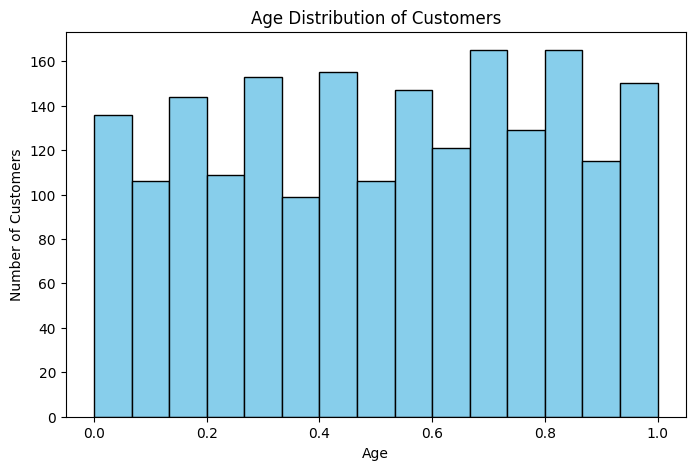

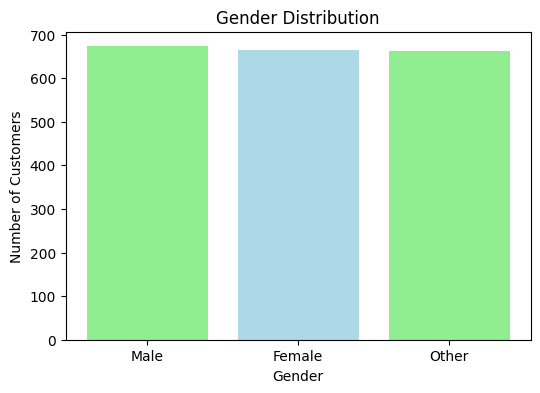

In [218]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightgreen','lightblue'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()



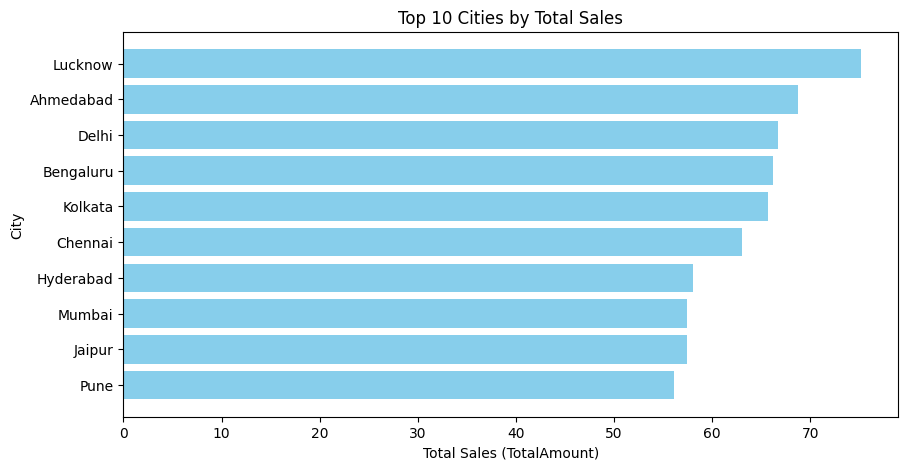

City
Lucknow      75.219218
Ahmedabad    68.766533
Delhi        66.729551
Bengaluru    66.223426
Kolkata      65.644398
Chennai      62.991704
Hyderabad    58.020545
Mumbai       57.445085
Jaipur       57.407032
Pune         56.145365
Name: TotalAmount, dtype: float64


In [219]:
city_sales = df.groupby('City')['TotalAmount'].sum()

top10_cities = city_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top10_cities.index, top10_cities.values, color='skyblue')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales (TotalAmount)")
plt.ylabel("City")
plt.gca().invert_yaxis()  
plt.show()
print(top10_cities)


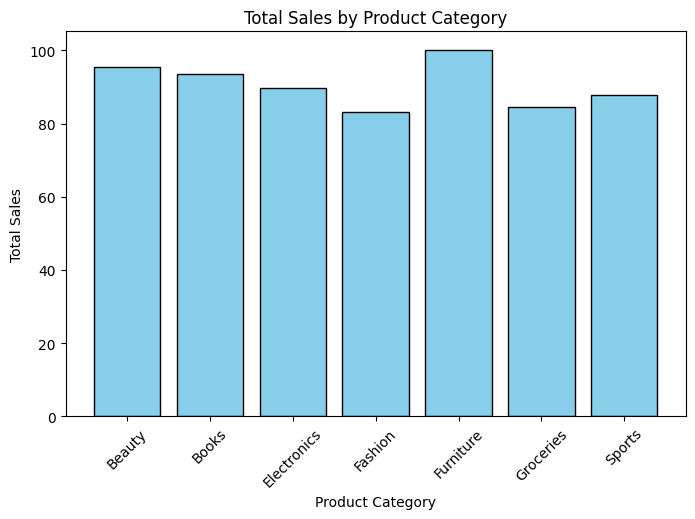

ProductCategory
Beauty          95.369387
Books           93.574378
Electronics     89.830379
Fashion         83.228574
Furniture      100.181187
Groceries       84.522904
Sports          87.886050
Name: TotalAmount, dtype: float64


In [220]:

category_sales =df.groupby('ProductCategory')["TotalAmount"].sum()
plt.figure(figsize=(8,5))
plt.bar(category_sales.index, category_sales.values, color='skyblue', edgecolor='black')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
print(category_sales)

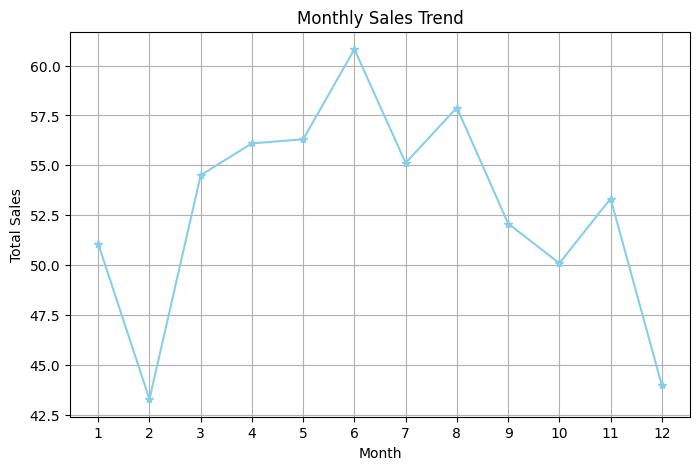

Month
1     51.074748
2     43.281086
3     54.506666
4     56.103324
5     56.304835
6     60.819973
7     55.119804
8     57.893263
9     52.085385
10    50.093570
11    53.333841
12    43.976362
Name: TotalAmount, dtype: float64


In [221]:
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(8,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='*', color='skyblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))  
plt.grid(True)
plt.show()

print(monthly_sales)

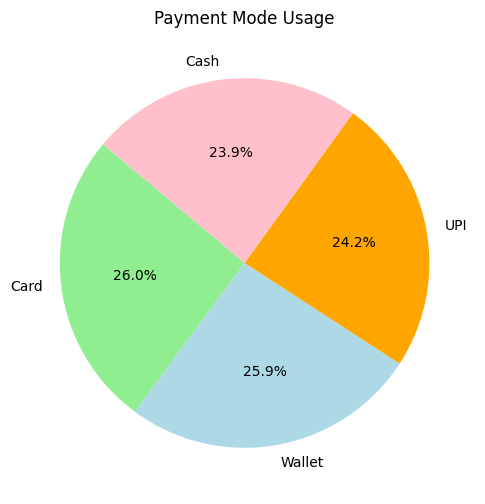

PaymentMode
Card      520
Wallet    519
UPI       484
Cash      477
Name: count, dtype: int64


In [222]:
payment_counts = df['PaymentMode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts.values, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['lightgreen','lightblue','orange','pink'])

plt.title("Payment Mode Usage")
plt.show()

print(payment_counts)

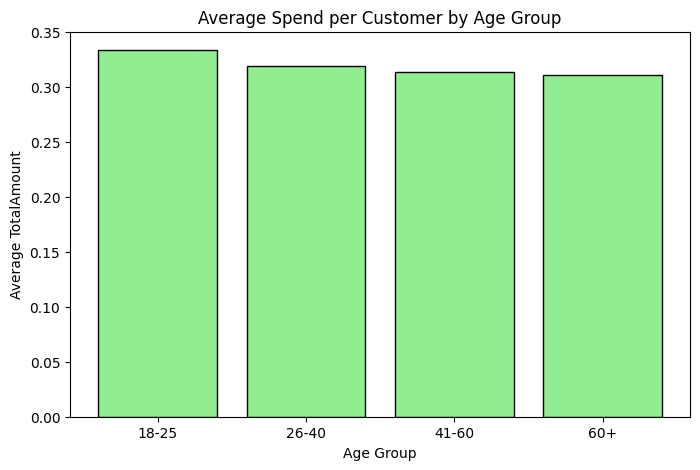

AgeGroup
18-25    0.333423
26-40    0.318950
41-60    0.313629
60+      0.310958
Name: TotalAmount, dtype: float64


In [223]:
avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_spend_age.index, avg_spend_age.values, color='lightgreen', edgecolor='black')
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average TotalAmount")
plt.show()

print(avg_spend_age)

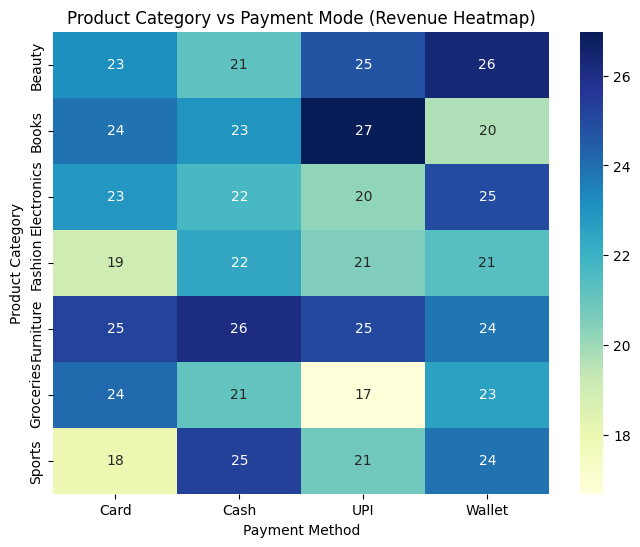

In [224]:
import seaborn as sns

heatmap_data = df.pivot_table(index='ProductCategory', 
                              columns='PaymentMode', 
                              values='TotalAmount', 
                              aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Product Category vs Payment Mode (Revenue Heatmap)")
plt.xlabel("Payment Method")
plt.ylabel("Product Category")
plt.show()


In [225]:
df.head()

,Index,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup,Gender_encoded,ProductCategory_encoded,City_encoded,Payment_encoded
0,1,T00001,C2824,Female,0.288462,Bengaluru,Fashion,3,0.893673,2023-03-15,Cash,0.588793,3,Wednesday,26-40,0,3,1,1
1,2,T00002,C1409,Other,0.038462,Pune,Books,5,0.194082,2023-01-22,Card,0.227281,1,Sunday,18-25,2,1,9,0
2,3,T00003,C5506,Other,0.557692,Pune,Furniture,1,0.002245,2023-04-18,Wallet,0.000000,4,Tuesday,41-60,2,4,9,3
3,4,T00004,C5012,Other,0.057692,Hyderabad,Groceries,5,0.580816,2023-08-09,Cash,0.645922,8,Wednesday,18-25,2,5,4,1
4,5,T00005,C4657,Female,0.442308,Chennai,Sports,1,0.616939,2023-09-23,Wallet,0.133081,9,Saturday,41-60,0,6,2,3


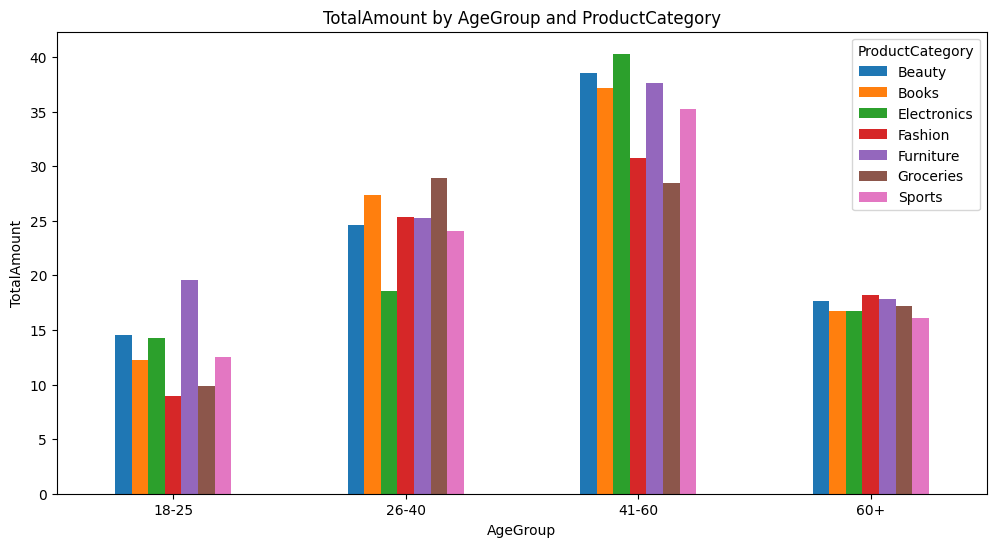

In [ ]:
age_product = df.groupby(['AgeGroup', 'ProductCategory'])['TotalAmount'].sum().unstack()#Group by AgeGroup and ProductCategory
age_product.plot(kind='bar', figsize=(12,6))
plt.title("TotalAmount by AgeGroup and ProductCategory")
plt.ylabel("TotalAmount")
plt.xlabel("AgeGroup")
plt.xticks(rotation=0)
plt.show()

PaymentMode
Cash      0.336994
UPI       0.320219
Wallet    0.313452
Card      0.300345
Name: TotalAmount, dtype: float64


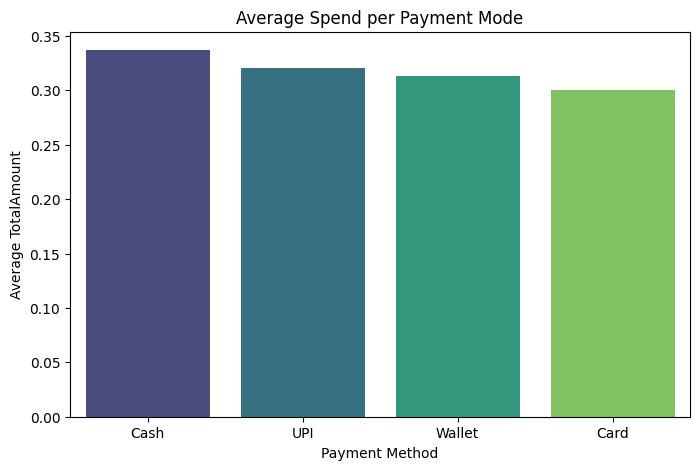

In [ ]:
payment_avg = df.groupby('PaymentMode')['TotalAmount'].mean().sort_values(ascending=False)
print(payment_avg)#Calculate Average TotalAmount per Payment Mode

plt.figure(figsize=(8,5))
sns.barplot(x=payment_avg.index, y=payment_avg.values, palette='viridis')
plt.title("Average Spend per Payment Mode")
plt.ylabel("Average TotalAmount")
plt.xlabel("Payment Method")
plt.show()